In [25]:
from langchain.agents import AgentType, initialize_agent
from langchain_community.embeddings import OllamaEmbeddings
from langchain.vectorstores import FAISS
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.docstore.document import Document
import os
from uuid import uuid4

In [ ]:
import os
from openai import OpenAI


api_key=("")

# client = OpenAI(
#     # This is the default and can be omitted
#     api_key=(""),
# )

# response = client.responses.create(
#     model="gpt-3.5-turbo-1106",
#     instructions="You are a coding assistant that talks like a pirate.",
#     input="How do I check if a Python object is an instance of a class?",
# )

# print(response.output_text)

In [ ]:
LANGSMITH_TRACING='true'
LANGSMITH_ENDPOINT="https://api.smith.langchain.com"
LANGSMITH_API_KEY=""
LANGSMITH_PROJECT="pr-overcooked-processor-93"
OPENAI_API_KEY=""

In [ ]:
# import requests
# from datetime import datetime, timedelta
# from bs4 import BeautifulSoup


# import re

# def limpiar_contenido(texto: str) -> str:
#     # Quitar múltiples espacios y saltos de línea innecesarios
#     texto = re.sub(r'\s+', ' ', texto)
#     # Quitar créditos típicos como "AFP via Getty Images", etc.
#     texto = re.sub(r'via Getty Images.*$', '', texto)
#     # Eliminar encabezados de autor si no aportan contenido
#     texto = re.sub(r'^[Bb]y\s+[A-Z][a-z]+(?:\s+[A-Z][a-z]+)*\s*', '', texto)
#     # Quitar líneas muy cortas que parecen ser firmas o relleno
#     texto = re.sub(r'\n.{1,10}\n', '\n', texto)
#     # Recortar bordes
#     return texto.strip()

# def get_news(queries: str, page_size: int = 20, from_days: int = 7) -> dict:
#     """
#     Obtiene noticias relevantes de la API de NewsAPI y extrae el contenido de los artículos.

#     :param queries: Palabras clave para buscar noticias.
#     :param page_size: Número máximo de artículos a recuperar.

#     :return: Un diccionario con los artículos relevantes y su contenido.
#     """

#     # Reemplaza con tu API key
#     api_key=''
#     base_url = "https://newsapi.org/v2/"
#     endpoint = "everything"  # Puedes cambiar esto por tus palabras clave
#     sorted_by = "publishedAt"  # Puedes cambiar esto por tus palabras clave
#     # Calcular la fecha de hace una semana (considerando la hora actual en Chile)
#     now_cl = datetime.now()
#     one_week_ago_cl = now_cl - timedelta(days=from_days)
#     from_date = one_week_ago_cl.strftime("%Y-%m-%d")

#     relevant_news = []
#     for query in queries:
#         url = f"{base_url}{endpoint}?q={query}&from={from_date}&pageSize={page_size}&sortedBy={sorted_by}&apiKey={api_key}"
#         response = requests.get(url)
#         data = response.json()

#         if response.status_code == 200:
#             articles = data.get("articles")
#             if articles:
#                 print(f"Noticias de '{query}' desde {from_date} hasta hoy:")
#                 count = 0
#                 for article in articles:
#                     article_url = article.get("url")
#                     # print(f"Título: {article.get('title')}")
#                     # print(f"URL: {article_url}")

#                     # Intentar obtener el contenido del artículo con varios tags
#                     content = ""
#                     try:
#                         article_response = requests.get(article_url)
#                         article_response.raise_for_status()
#                         soup = BeautifulSoup(article_response.text, 'html.parser')

#                         possible_containers = [
#                             'article',
#                             'div[itemprop="articleBody"]',
#                             'div[class*="article"]',
#                             'section[class*="content"]',
#                             'div[class*="story"]',
#                             'main',
#                             'div[role="main"]',
#                             'div[class*="text"]',
#                         ]

#                         for selector in possible_containers:
#                             container = soup.select_one(selector)
#                             if container:
#                                 content = '\n'.join([p.get_text() for p in container.find_all('p')])
#                                 if content.strip():  # Si encontramos contenido, detenemos la búsqueda
#                                     break

#                         if not content.strip():
#                             # Si no se encontró un contenedor específico, extraer texto de todos los párrafos
#                             content = '\n'.join([p.get_text() for p in soup.find_all('p')])

#                         # print(f"Contenido:\n{content[:500]}..." if len(content) > 500 else f"Contenido:\n{content}") # Mostrar solo los primeros 500 caracteres para no saturar la salida

#                     except requests.exceptions.RequestException as e:
#                         # print(f"No se pudo obtener el artículo: {e}")
#                         content = None  # No se pudo obtener el contenido
#                     except AttributeError:
#                         # print("No se pudo extraer el contenido del artículo (estructura HTML inesperada).")
#                         content = None

#                     if content:
#                         count += 1
#                         # print("news found!!!!")
#                         # Guardar el artículo en el diccionario solo si se obtuvo contenido
                        
#                         cleaned_content = limpiar_contenido(content)
#                         cleaned_content = cleaned_content[:1250]  # Limitar el contenido a los primeros 2000 caracteres
                        
#                         relevant_news.append({
#                             "title": article.get("title"),
#                             # "description": article.get("description"),
#                             "content": cleaned_content,  
#                             "source": article.get("source", {}).get("name", "Desconocido"),
#                             "url": article_url,
#                         })
#                     if count >= 4:
#                         break
                                    
#                 print(f"Se encontraron {count} artículos relevantes para '{query}'.")
#             else:
#                 print("No se encontraron noticias para los criterios especificados en la última semana.")
#                 content = None  # No se encontraron artículos
            
#         else:
#             print(f"Error al hacer la solicitud: {response.status_code}")
#             print(f"Mensaje de error: {data.get('message')}")
#     return relevant_news

In [ ]:
import requests
from datetime import datetime, timedelta
from bs4 import BeautifulSoup
import re


def limpiar_contenido(texto: str) -> str:
    texto = re.sub(r'\s+', ' ', texto)
    texto = re.sub(r'via Getty Images.*$', '', texto)
    texto = re.sub(r'^[Bb]y\s+[A-Z][a-z]+(?:\s+[A-Z][a-z]+)*\s*', '', texto)
    texto = re.sub(r'\n.{1,10}\n', '\n', texto)
    return texto.strip()


def extraer_contenido_html(html: str) -> str:
    soup = BeautifulSoup(html, 'html.parser')

    possible_selectors = [
        'article',
        'div[itemprop="articleBody"]',
        'div[class*="article"]',
        'section[class*="content"]',
        'div[class*="story"]',
        'main',
        'div[role="main"]',
        'div[class*="text"]',
    ]

    containers = soup.select(','.join(possible_selectors))
    container = max(containers, key=lambda c: len(c.find_all('p')), default=None)

    def limpiar_parrafos(parrafos):
        vistos = set()
        limpios = []
        for p in parrafos:
            texto = p.get_text().strip()
            if len(texto) >= 40 and texto not in vistos:
                limpios.append(texto)
                vistos.add(texto)
        return limpios

    if container:
        parrafos = limpiar_parrafos(container.find_all('p'))
    else:
        parrafos = limpiar_parrafos(soup.find_all('p'))

    return '\n'.join(parrafos)


def obtener_articulos(query: str, api_key: str, page_size: int, from_date: str, max_articulos: int = 10) -> list:
    url = (
        f"https://newsapi.org/v2/everything?q={query}"
        f"&from={from_date}&pageSize={page_size}"
        f"&sortBy=publishedAt&apiKey={api_key}"
    )

    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error en la solicitud: {e}")
        return []

    articles = data.get("articles", [])
    resultados = []

    for article in articles:
        try:
            raw_html = requests.get(article["url"]).text
            contenido = extraer_contenido_html(raw_html)
            if contenido:
                contenido_limpio = limpiar_contenido(contenido) #[:1250]
                resultados.append({
                    "title": article.get("title"),
                    "content": contenido_limpio,
                    "source": article.get("source", {}).get("name", "Desconocido"),
                    "url": article.get("url"),
                })
                if len(resultados) >= max_articulos:
                    break
        except Exception as e:
            print(f"No se pudo procesar {article['url']}: {e}")

    print(f"🔍 Se encontraron {len(resultados)} artículos relevantes para '{query}'.")
    return resultados


def get_news(queries: list[str], page_size: int = 20, from_days: int = 7) -> list[dict]:
    # api_key = ""     
    # api_key = ""
    api_key = ''

    from_date = (datetime.now() - timedelta(days=from_days)).strftime("%Y-%m-%d")

    todas_las_noticias = []
    for query in queries:
        print(f"\n📚 Buscando noticias para: '{query}' desde {from_date}...")
        noticias = obtener_articulos(query, api_key, page_size, from_date)
        todas_las_noticias.extend(noticias)

    return todas_las_noticias


In [30]:
from typing import List
from langchain.schema import Document
from langchain_openai import OpenAIEmbeddings

def index_news(noticias: List[dict], 
               path_indice: str = "./data/faiss_news_index/", 
               chequear_duplicados: bool = True) -> None:
    
    import hashlib, os
    from uuid import uuid4
    from langchain.vectorstores import FAISS
    from langchain.text_splitter import RecursiveCharacterTextSplitter


    
    print("Iniciando indexación de noticias...")
    embedding_model = OpenAIEmbeddings(
    model="text-embedding-3-small",  # o el que quieras usar
    openai_api_key=api_key,  
    )

    splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=40)

    def hash_text(text: str) -> str:
        return hashlib.md5(text.encode('utf-8')).hexdigest()

    if not noticias:
        print("No se encontraron noticias relevantes.")
        vectorstore = FAISS.load_local(path_indice, embedding_model, allow_dangerous_deserialization=True)
        return vectorstore



    # Extraer contenidos y metadatas primero
    contenidos, metadatas = [], []
    for noticia in noticias:
        contenido = noticia.get("content", "") or ""
        if contenido.strip() == "":
            continue
        contenidos.append(contenido)
        metadatas.append({
            "title": noticia.get("title", ""),
            "source": noticia.get("source", ""),
            "url": noticia.get("url", ""),
        })

    # Procesar en lote
    print("Dividiendo noticias en chunks...")
    documentos_nuevos = splitter.create_documents(contenidos, metadatas=metadatas)

    if not documentos_nuevos:
        print("No hay contenido útil para indexar.")
        return

    contenido_existente = set()

    # Cargar índice si existe
    if os.path.exists(path_indice):
        print("Cargando índice existente...")
        vectorstore = FAISS.load_local(path_indice, embedding_model, allow_dangerous_deserialization=True)
        if chequear_duplicados:
            documentos_existentes = vectorstore.docstore._dict.values()
            contenido_existente = set(hash_text(doc.page_content) for doc in documentos_existentes)
    else:
        print("Creando nuevo índice FAISS...")
        vectorstore = FAISS.from_documents(documentos_nuevos, embedding_model)

    # Filtrar duplicados
    print("Filtrando duplicados...")
    if chequear_duplicados:
        documentos_para_agregar = [doc for doc in documentos_nuevos if hash_text(doc.page_content) not in contenido_existente]
    else:
        documentos_para_agregar = documentos_nuevos

    if not documentos_para_agregar:
        print("Las noticias ya estaban indexadas. No se agregaron documentos nuevos.")
        return vectorstore

    ids = [str(uuid4()) for _ in documentos_para_agregar]

    print(f"Agregando {len(documentos_para_agregar)} documentos al índice...")
    vectorstore.add_documents(documents=documentos_para_agregar, ids=ids)

    vectorstore.save_local(path_indice)
    print(f"Índice actualizado con {len(documentos_para_agregar)} nuevas noticias.")
    return vectorstore


In [31]:
def generate_initial_portfolio() -> list:
    portfolio = [
        "Equity Tech Fund"
        "Green Energy ETF",
        "Health Bio Stocks",
        "Global Bonds Fund",
        "CryptoIndex",
        "Real Estate REIT",
        "Emerging Markets Fund",
        "AI & Robotics ETF",
        "Commodities Basket"    
        ]
    return portfolio


nodo 1

In [32]:
def nodo_1_generar_portafolio_inicial(state: dict = None) -> dict:
    """
    Nodo 1: Bienvenida y generación del portafolio inicial con distribución fija.
    """
    tickers = generate_initial_portfolio()
    mensaje_bienvenida = (
        "¡Bienvenido al asistente de inversiones!\n"
        "Hemos generado un portafolio inicial diversificado basado en diferentes sectores del mercado."
    )

    return{
        **state,
        "tickers": tickers, # Excluyendo 'Cash Reserve'
        "mensaje": mensaje_bienvenida
    }


In [33]:
portfolio = {
    "Equity Tech Fund": 0.20,
    "Green Energy ETF": 0.15,
    "Health Bio Stocks": 0.10,
    "Global Bonds Fund": 0.10,
    "CryptoIndex": 0.10,
    "Real Estate REIT": 0.10,
    "Emerging Markets Fund": 0.10,
    "AI & Robotics ETF": 0.05,
    "Commodities Basket": 0.05,
    "Cash Reserve": 0.05
}
sum(portfolio.values())

1.0

In [34]:
def nodo_2_indexar_noticias(state: dict) -> dict:
    # 1. Generar cartera inicial (puedes parametrizar por monto total)
    portfolio = {
        "Equity Tech Fund": 0.20,
        "Green Energy ETF": 0.15,
        "Health Bio Stocks": 0.10,
        "Global Bonds Fund": 0.10,
        "CryptoIndex": 0.10,
        "Real Estate REIT": 0.10,
        "Emerging Markets Fund": 0.10,
        "AI & Robotics ETF": 0.05,
        "Commodities Basket": 0.05,
        "Cash Reserve": 0.05
    }
    # 2. Extraer tickers/sectores de la cartera
    tickers = [asset for asset in portfolio]

    # 3. Obtener noticias desde NewsAPI
    # news_data = get_news(tickers, from_days=20)
    news_data=[]
    print("news_data", news_data)
    
    # 4. Indexar en vectorstore con embeddings (incluye metadata)
    vectorstore = index_news(noticias=news_data)
    print("vectorstore", vectorstore)

    return {
        **state,
        "portfolio": portfolio,
        "vectorstore": vectorstore,
        "mensaje": "Noticias indexadas exitosamente. Puedes revisar el portafolio o buscar información adicional.",
    }


In [35]:
def initialize_agents(state:dict) -> dict:
    """
    Inicializa los agentes.
    """
    if not state.get("agents_initialized", False):  # Verificar si los agentes ya fueron creados
        chat = agentChat()  # Crear el agente executor
        executor = agentPortfolio()  # Crear el agente portfolio
        state["agents_initialized"] = True  # Marcar como inicializado
        return {
            **state,
            'agent_portfolio': executor,
            'agent_chat': chat,
            "next_node": "nodo_3_pedir_accion_usuario",
            "mensaje": "Agentes inicializados exitosamente.",
        }
    else:
        return {
            **state,
            "next_node": "nodo_3_pedir_accion_usuario",
            "mensaje": "Los agentes ya han sido inicializados.",
        }

In [36]:
def nodo_3_pedir_accion_usuario(state: dict) -> dict:
    """
    Nodo 3:Pregunta al usuario qué acción desea realizar.
    """

    mensaje = (
        "¿Qué acción te gustaría realizar? Escribe una opción o número\n"
        "1. Actualizar Noticias\n"
        "2. Conversar\n"
        "3. Rebalancear Portafolio\n")
    while 1:
        user_action = str(input(mensaje))

        if user_action == "1" or user_action.lower() == "actualizar noticias":
            action = "actualizar noticias"
            break
        elif user_action == "2" or user_action.lower() == "conversar":
            action = "hacer preguntas"
            break
        elif user_action == "3" or user_action.lower() == " rebalancear portafolio":
            action = "sugerir rebalanceo"
            break
        elif user_action.lower() == "salir" or user_action.lower() == "exit":
            action = "salir"
            break
        else:
            action = None
            print("Acción no válida. Por favor, elige una opción válida.")
        print("action", action)
    return {
        **state,
        "mensaje": mensaje,
        "next_action": action,  # next_action indica siguiente paso
    }

In [38]:
from langchain.prompts import PromptTemplate
from langchain.tools import Tool
from langchain.agents import create_react_agent, AgentExecutor
from langchain.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
import os


# Nodo de conversación
def nodo_5_responder_dudas(state: dict) -> dict:
    agent_chat = state["agent_chat"]  # Obtener el agente executor
    while 1:
        input_message = input("Escribe tu pregunta (u 'opciones' (o) para volver): ")

        if input_message.lower() in ["opciones", "o"]:
            break
        result = agent_chat.invoke({"input": input_message})
        print("\n🧠 Respuesta del asistente:", result["output"])

    return {
        **state,
        "next_action": "opciones"
    }
    # return {
    #     **state,
    #     "mensaje": result["output"],
    #     "next_action": "hacer preguntas",
    # }


In [39]:
import ast

def nodo_6_rebalanceo_recomendado(state: dict) -> dict:
    """
    Nodo de rebalanceo recomendado.
    """

    print(str(state["portfolio"]))
    agent_portfolio = state["agent_portfolio"]  # Obtener el agente executor
    result = agent_portfolio.invoke({"input": str(state["portfolio"])})
    print("\n🧠 Respuesta del asistente:", result["output"])
    
    print("Rebalanceo recomendado:")
    new_portfolio = ast.literal_eval(result["output"].split('$$')[0])
    print(new_portfolio)
    print()

    input_message = input("Deseas rebalancear el portafolio? (si/no): ")
    if input_message.lower() == "si":
        # Aquí puedes agregar la lógica para rebalancear el portafolio
        print("Rebalanceando el portafolio...")
        return {
            **state,
            "mensaje": result["output"],
            "portfolio": new_portfolio,
            "next_action": "aplicar",
        }
        # Lógica de rebalanceo aquí

    elif input_message.lower() == "no":
        print("No se realizará ningún cambio en el portafolio.")
        return {
            **state,
            "mensaje": result["output"],
            "next_action": "rechazar",
        }

    else:
        print("Opción no válida. No se realizará ningún cambio en el portafolio.")
        return {
            **state,
            "mensaje": result["output"],
            "next_action": "rechazar",
    }

In [40]:
def agentChat():
    
    # Asegúrate de tener configurada tu API key
    os.environ["OPENAI_API_KEY"] = api_key

    # Paso 1: Configurar el vectorstore como herramienta de búsqueda
    embeddings = OpenAIEmbeddings(model="text-embedding-3-small")  # o "text-embedding-ada-002"
    db = FAISS.load_local("./data/faiss_news_index", embeddings=embeddings, allow_dangerous_deserialization=True)
    retriever = db.as_retriever()

    def buscar_contexto(query: str) -> str:
        docs = retriever.get_relevant_documents(query)
        return "\n\n".join([
            f"Título: {doc.metadata.get('title', 'N/A')}\n"
            f"Fuente: {doc.metadata.get('source', 'N/A')}\n"
            f"URL: {doc.metadata.get('url', 'N/A')}\n"
            f"Contenido: {doc.page_content}"
            for doc in docs
        ])


    herramienta_busqueda = Tool(
        name="BuscadorNoticias",
        func=buscar_contexto,
        description="Use this tool to search for relevant news articles."
    )

    def get_current_time_tool(_: str = "") -> str:
        """Returns the current time as a string."""
        return str(datetime.now())
    
    herramienta_busqueda_2 = Tool(
        name="CurrentTime",
        func=get_current_time_tool,
        description="Use this tool to get the current time.",
    )
    
    # Paso 2: Crear el LLM y el prompt personalizado
    llm = ChatOpenAI(model="gpt-3.5-turbo-1106", temperature=0)

    prompt = PromptTemplate.from_template("""
    You are a helpful and knowledgeable financial assistant. Your job is to help the user understand their investment portfolio and stay updated with relevant news in the financial markets.

    You have access to the following tools taht can help you answer questions and provide information about latest news: 
    {tools}

    You must strictly follow this format when reasoning and taking actions:

    ---
    Question: {input}
    Thought: (Describe what you are thinking. What do you need to consider or find out?)
    Action: (Choose exactly one tool from [{tool_names}])
    Action Input: (What information do you want to retrieve or query?)
    Observation: (Result returned by the tool)
    ... (Repeat Thought / Action / Action Input / Observation as needed)
    Thought: (Summarize what you've learned. Are you ready to respond?)
    Final Answer: (Provide the final and complete answer to the user)
    ---

    **Rules:**
    - Never include both a Final Answer and an Action in the same step.
    - If the user greets or says something casual (e.g., "hello"), respond kindly without using any tools.
    - Only use a tool if it helps answer the user's question better.
    - If no tool is needed, go directly to the Final Answer after a clear Thought step.
    - Be concise, accurate, and helpful in your answers.

    Begin!

    Question: {input}
    {agent_scratchpad}
    """)


    # Paso 3: Crear el agente y su ejecutor
    react_agent = create_react_agent(
        llm=llm,
        tools=[herramienta_busqueda, herramienta_busqueda_2],
        prompt=prompt,
    )

    agent_executor = AgentExecutor(
        agent=react_agent,
        tools=[herramienta_busqueda, herramienta_busqueda_2],
        handle_parsing_errors="Check your output and make sure it conforms! Do not output an action and a final answer at the same time.",
        max_iterations=15,
        verbose=True
    )
    return agent_executor

In [41]:
def agentPortfolio():
     # Asegúrate de tener configurada tu API key
    os.environ["OPENAI_API_KEY"] = api_key

    # Paso 1: Configurar el vectorstore como herramienta de búsqueda
    embeddings = OpenAIEmbeddings(model="text-embedding-3-small")  # o "text-embedding-ada-002"
    db = FAISS.load_local("./data/faiss_news_index/", embeddings=embeddings, allow_dangerous_deserialization=True)
    retriever = db.as_retriever()

    def buscar_contexto(query: str) -> str:
        docs = retriever.get_relevant_documents(query)
        return "\n\n".join([
            f"Título: {doc.metadata.get('title', 'N/A')}\n"
            f"Fuente: {doc.metadata.get('source', 'N/A')}\n"
            f"URL: {doc.metadata.get('url', 'N/A')}\n"
            f"Contenido: {doc.page_content}"
            for doc in docs
        ])

    herramienta_busqueda = Tool(
        name="BuscadorNoticias",
        func=buscar_contexto,
        description="Usa esto para buscar información en las noticias indexadas."
    )

    # Paso 2: Crear el LLM y el prompt personalizado
    llm = ChatOpenAI(model="gpt-3.5-turbo-1106", temperature=0)


    from langchain_core.prompts import PromptTemplate

    prompt = PromptTemplate.from_template("""
    You are a smart and reliable financial assistant. Your job is to analyze the user's current investment portfolio and propose a new distribution of assets based on recent financial news and market signals.

    You will respond with:
    1. A Python dictionary representing the new portfolio distribution. Each key is an asset name and the value is the percentage of the total investment (must sum to exactly 1.0).
    2. A clear, explanation of your reasoning and why to increase o decrease percentages (include link or references) after the separator $$.

    You have access to the following tools:
    {tools}

    Follow **strictly** this reasoning and output format:

    ---
    Question: {input}
    Thought: (Reflect on the user's current portfolio and what needs adjustment. Decide what information you need.)
    Action: (Pick exactly one tool from [{tool_names}])
    Action Input: (The specific query you want to run using the tool)
    Observation: (The output from the tool)
    ... (You can repeat Thought / Action / Action Input / Observation as many times as needed)
    Thought: (Summarize insights and prepare final output)    
                          
    Final Answer: (Python dict representing new portfolio allocation wich all percentages sum exactly 1.0) $$ (Short explanation of the reasoning behind your choices)
    ---

    ----                                             
    EXAMPLE:
        "Equity Tech Fund": 0.20,
        "Green Energy ETF": 0.15,
        "Health Bio Stocks": 0.10,
        "Global Bonds Fund": 0.10,
        "CryptoIndex": 0.10,
        "Real Estate REIT": 0.10,
        "Emerging Markets Fund": 0.10,
        "AI & Robotics ETF": 0.05,
        "Commodities Basket": 0.05,
        "Cash Reserve": 0.05        
        0.20 + 0.15 + 0.10 + 0.10 + 0.10 + 0.10 + 0.10 + 0.05 + 0.05 + 0.05 = 1.00                            
    ----

    **Important Rules:**
    - Do not include both an Action and a Final Answer in the same step.
    - The percentages in the final dictionary must sum to exactly 1.0 (i.e., 100%), **including Cash Reserve**.
    - Be precise, relevant, and professional.
    - Use tools only when needed. If no tools are necessary, go straight to the Final Answer after your analysis.
    - If the user says something casual (e.g., "hi", "thanks"), respond politely without using tools or producing a Final Answer.
    - Never guess. If you don't know something, say "I don't know".
    - Write the dictionary then $$ the explanation. Do not include any other text or comments.

    Begin:

    Question: {input}
    {agent_scratchpad}
    """)



    # Paso 3: Crear el agente y su ejecutor
    react_agent = create_react_agent(
        llm=llm,
        tools=[herramienta_busqueda],
        prompt=prompt,
    )

    agent_executor = AgentExecutor(
        agent=react_agent,
        tools=[herramienta_busqueda],
        handle_parsing_errors="Check your output, parse everything right, change this if you need to!",
        max_iterations=5,
        verbose=True
    )
    return agent_executor

In [42]:
from langgraph.graph import StateGraph, END, START
from langchain_core.messages import BaseMessage
from langchain_core.agents import AgentAction
from typing import Annotated
import operator

# Define el estado (puedes agregar más atributos según lo que uses)
from typing_extensions import TypedDict
 
class State(TypedDict):
    portfolio: dict
    new_portfolio: dict
    tickers: list
    vectorstore: object
    messages: Annotated[list[BaseMessage], operator.add]
    next_action: str
    agent_chat: object
    agent_portfolio: object


# Construcción del workflow
workflow = StateGraph(State)

# Añadir nodos con los nombres definidos
workflow.add_node("nodo_1_generar_portafolio_inicial", nodo_1_generar_portafolio_inicial)
workflow.add_node("nodo_2_indexar_noticias", nodo_2_indexar_noticias)
workflow.add_node("initialize_agents", initialize_agents)


workflow.add_node("nodo_3_pedir_accion_usuario", nodo_3_pedir_accion_usuario)
# workflow.add_node("nodo_4_actualizar_noticias_por_sector", nodo_4_actualizar_noticias_por_sector)
workflow.add_node("nodo_5_responder_dudas", nodo_5_responder_dudas)
workflow.add_node("nodo_6_rebalanceo_recomendado", nodo_6_rebalanceo_recomendado)
# workflow.add_node("nodo_7_aceptar_rechazar_rebalanceo", nodo_7_aceptar_rechazar_rebalanceo)
# workflow.add_node("nodo_8_procesar_decision_rebalanceo", nodo_8_procesar_decision_rebalanceo)
# workflow.add_node("nodo_9_generar_reporte", nodo_9_generar_reporte)
# workflow.add_node("nodo_10_continuar_o_finalizar", nodo_10_continuar_o_finalizar)

# Edges: conectar nodos
workflow.add_edge(START, "nodo_1_generar_portafolio_inicial")
workflow.add_edge("nodo_1_generar_portafolio_inicial", "nodo_2_indexar_noticias")

workflow.add_edge("nodo_2_indexar_noticias", "initialize_agents")
workflow.add_edge("initialize_agents", "nodo_3_pedir_accion_usuario")

workflow.add_conditional_edges(
    "nodo_3_pedir_accion_usuario",
    lambda state: state["next_action"],  # next_action indica siguiente paso
    {
        "actualizar noticias": "nodo_2_indexar_noticias",
        "hacer preguntas": "nodo_5_responder_dudas",
        "sugerir rebalanceo": "nodo_6_rebalanceo_recomendado",
        "salir": END
    },
)

workflow.add_edge("nodo_5_responder_dudas", "nodo_3_pedir_accion_usuario")


# workflow.add_edge("nodo_6_rebalanceo_recomendado", "nodo_7_aceptar_rechazar_rebalanceo")

workflow.add_edge("nodo_6_rebalanceo_recomendado", "nodo_3_pedir_accion_usuario")
# workflow.add_conditional_edges(
#     "nodo_6_rebalanceo_recomendado",
#     # lambda state: "aplicar" if state.get("rebalance_accepted") else None,
#     lambda state: state["next_action"],  # next_action indica siguiente paso
#     {
#         "aplicar": "nodo_8_procesar_decision_rebalanceo",
#         "rechazar": "nodo_3_pedir_accion_usuario"
#     },
# )

# workflow.add_edge("nodo_8_procesar_decision_rebalanceo", "nodo_3_pedir_accion_usuario")
# workflow.add_edge("nodo_9_generar_reporte", "nodo_10_continuar_o_finalizar")


# workflow.add_conditional_edges(
#     "nodo_10_continuar_o_finalizar",
#     lambda state: state["next_action"],  # next_action indica siguiente paso
#     {
#         "continuar": "nodo_3_pedir_accion_usuario",  # vuelve a indexar nuevas noticias
#         "finalizar": END,
#     }
# )

# Compilar

graph = workflow.compile()


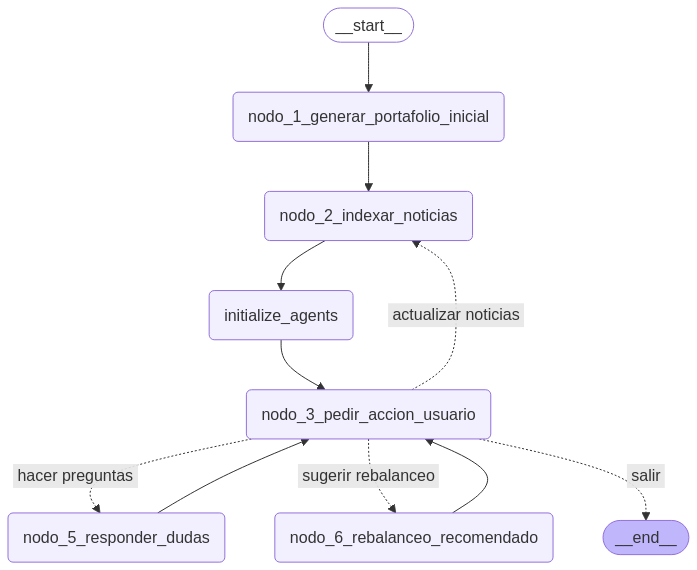

In [43]:
graph.step_timeout = 60 * 60 * 24  # 24 horas
graph

In [44]:
initial_state = {
    "portfolio": {},
    "new_portfolio": {},
    "tickers": [],
    "vectorstore": None,
    "message": "",
    "next_action": None,
    
}

final_state = graph.invoke(initial_state)
print("Final state:")
print(final_state)



news_data []
Iniciando indexación de noticias...
No se encontraron noticias relevantes.
vectorstore <langchain_community.vectorstores.faiss.FAISS object at 0x000002028857B5B0>


> Entering new AgentExecutor chain...
Could not parse LLM output: `Hello! How can I assist you today?`
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE Check your output and make sure it conforms! Do not output an action and a final answer at the same time.I don't need a tool for this casual greeting. I'll respond kindly without using any tools.

Final Answer: Hello! How can I assist you today?

> Finished chain.

🧠 Respuesta del asistente: Hello! How can I assist you today?


> Entering new AgentExecutor chain...
Thought: I need to consider the current market trends and news to determine which sector is safer for investment.
Action: BuscadorNoticias
Action Input: "safest investment sector"Título: US dollar keeps falling as its ‘safe haven’ status is qu

In [45]:
tmp ={
    'Equity Tech Fund': 0.15,
    'Green Energy ETF': 0.15,
    'Health Bio Stocks': 0.1,
    'Global Bonds Fund': 0.15,
    'CryptoIndex': 0.1,
    'Real Estate REIT': 0.1,
    'Emerging Markets Fund': 0.1,
    'AI & Robotics ETF': 0.05,
    'Commodities Basket': 0.05,
    'Cash Reserve': 0.05
}

In [46]:
tmp2 = {'Equity Tech Fund': 0.2, 
        'Green Energy ETF': 0.15, 
        'Health Bio Stocks': 0.1, 
        'Global Bonds Fund': 0.1, 
        'CryptoIndex': 0.1, 
        'Real Estate REIT': 0.1, 
        'Emerging Markets Fund': 0.1, 
        'AI & Robotics ETF': 0.05, 
        'Commodities Basket': 0.05, 
        'Cash Reserve': 0.1
    }

In [47]:
sum(tmp.values())

1.0

In [48]:
final_state['vectorstore'].similarity_search("elon musk", k=100)


[Document(id='94e23183-5ebc-4177-a9c3-0c952479adec', metadata={'title': 'Slog AM: Trump Continues Tariffs Terrorism, the White House Hates Pronouns, and the J-Pod Has a New Baby Orca', 'source': 'TheStranger.com', 'url': 'https://www.thestranger.com/slog-am/2025/04/09/80004940/slog-am-trump-continues-tariffs-terrorism-the-white-house-hates-pronouns-and-the-j-pod-has-a-new-baby-orca'}, page_content='shirts to all press briefings. More of This, Please: On Saturday, Elon Musk, who regularly brags about being really good at video games, livestreamed himself playing Path of Exile 2 on his private jet. Soon after he started his gaming session, his chat was inundated with (sometimes very hilarious)'),
 Document(id='ced05783-9e17-4221-8774-6f6b10f715e2', metadata={'title': 'Slog AM: Trump Continues Tariffs Terrorism, the White House Hates Pronouns, and the J-Pod Has a New Baby Orca', 'source': 'TheStranger.com', 'url': 'https://www.thestranger.com/slog-am/2025/04/09/80004940/slog-am-trump-cont